In [108]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
# Генерируем качественные данные

np.random.seed(42)

X1 = np.linspace(0, 10, 100)
y1 = 2 * X1 + 1 + np.random.normal(0, 0.5, 100)
df1 = pd.DataFrame({'X': X1, 'y': y1})

X2 = np.linspace(0, 5, 100)
y2 = 5 * X2 - 3 + np.random.normal(0, 0.3, 100)
df2 = pd.DataFrame({'X': X2, 'y': y2})

X3 = np.linspace(-2, 8, 100)
y3 = X3 + 2 + np.random.normal(0, 0.7, 100)
df3 = pd.DataFrame({'X': X3, 'y': y3})

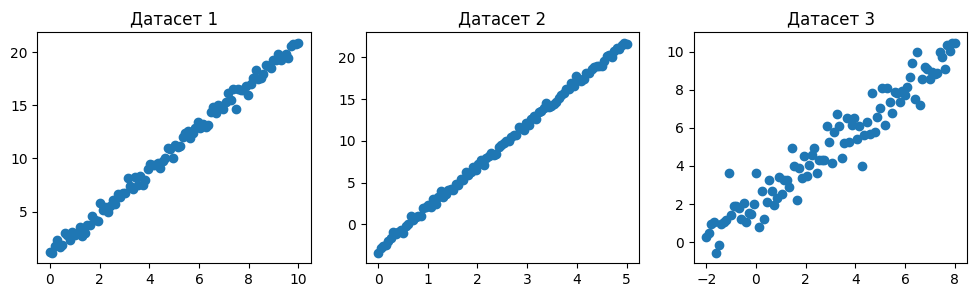

In [110]:
# Визуализируем данные
plt.figure(figsize=(12, 3))
for i, (x, y) in enumerate([(X1, y1), (X2, y2), (X3, y3)], 1):
    plt.subplot(1, 3, i)
    plt.scatter(x, y)
    plt.title(f"Датасет {i}")
plt.show()

Model coefficients: intercept=0.9135935729613163, slope=2.006896633668328
Mean Squared Error: 0.2037
R2 Score: 0.9941


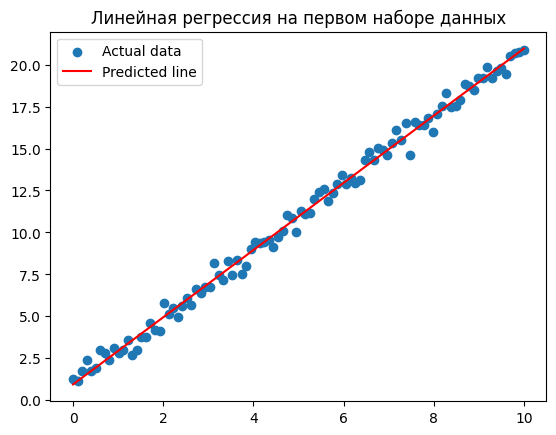

In [111]:
# Обучаем модель линейной регрессии на первом наборе данных
model = LinearRegression()
model.fit(df1[['X']], df1['y'])

y_pred = model.predict(df1[['X']])

mse = mean_squared_error(df1['y'], y_pred)
r2 = r2_score(df1['y'], y_pred)

print(f"Model coefficients: intercept={model.intercept_}, slope={model.coef_[0]}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Візуалізація результатів
plt.scatter(df1['X'], df1['y'], label='Actual data')
plt.plot(df1['X'], y_pred, color='red', label='Predicted line')
plt.title('Линейная регрессия на первом наборе данных')
plt.legend()
plt.show()

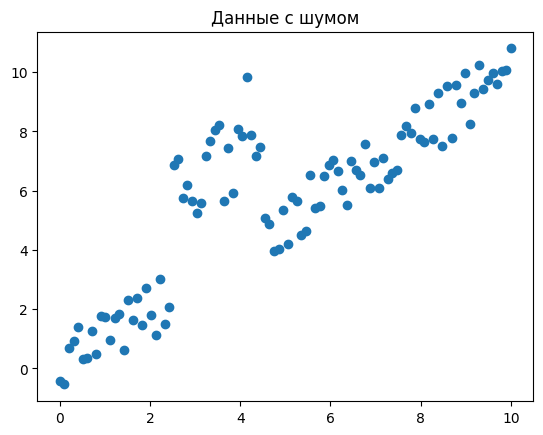

In [112]:
# Создание зашумленного набора данных
xs_noise = np.linspace(0, 10, 100)
ys_noise = xs_noise + np.random.random(100) * 2 - 1
ys_noise[25:45] *= 2  # добавляем шум
df_noisy = pd.DataFrame({'X': xs_noise, 'y': ys_noise})


plt.scatter(df_noisy['X'], df_noisy["y"])
plt.title("Данные с шумом")
plt.show()

In [113]:
# Создание файлов CSV
!mkdir data

df1.to_csv('data/dataset1.csv', index=False)
df2.to_csv('data/dataset2.csv', index=False)
df3.to_csv('data/dataset3.csv', index=False)
df_noisy.to_csv('data/dataset_noisy.csv', index=False)

�������� ��� 䠩� data 㦥 �������.


In [114]:
%%writefile test_model.py
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pytest

# Загрузка датасетов
df1 = pd.read_csv('data/dataset1.csv')
df2 = pd.read_csv('data/dataset2.csv')
df3 = pd.read_csv('data/dataset3.csv')
df_noisy = pd.read_csv('data/dataset_noisy.csv')

# Обучаем модель линейной регрессии на первом наборе данных
@pytest.fixture
def trained_model():
    model = LinearRegression()
    model.fit(df1[['X']], df1['y'])
    return model

# Тесты
def test_model_on_clean_data1(trained_model):
    y_pred = trained_model.predict(df1[['X']])
    mse = mean_squared_error(df1['y'], y_pred)
    r2 = r2_score(df1['y'], y_pred)
    assert mse < 0.5, f"MSE на чистом датасете 1 слишком высокое: {mse}"
    assert r2 > 0.9, f"R2 на чистом датасете 1 слишком низкое: {r2}"

def test_model_on_clean_data2(trained_model):
    y_pred = trained_model.predict(df2[['X']])
    mse = mean_squared_error(df2['y'], y_pred)
    assert mse > 1.0, "Ожидалось, что модель будет работать хуже на датасете 2"

def test_model_on_clean_data3(trained_model):
    y_pred = trained_model.predict(df3[['X']])
    mse = mean_squared_error(df3['y'], y_pred)
    assert mse > 1.0, "Ожидалось, что модель будет работать хуже на датасете 3"

def test_model_on_noisy_data(trained_model):
    y_pred = trained_model.predict(df_noisy[['X']])
    mse = mean_squared_error(df_noisy['y'], y_pred)
    r2 = r2_score(df_noisy['y'], y_pred)
    assert mse > 5.0, f"MSE на зашумленном датасете слишком низкое: {mse}"
    assert r2 < 0.5, f"R2 на зашумленном датасете слишком высокое: {r2}"

Overwriting test_model.py


In [115]:
# Запуск тестов
!pytest test_model.py -v

============================= test session starts =============================
platform win32 -- Python 3.13.3, pytest-8.3.5, pluggy-1.6.0 -- d:\project\MLOps_labs\lab5\.venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: d:\project\MLOps_labs\lab5
collecting ... collected 4 items

test_model.py::test_model_on_clean_data1 PASSED                          [ 25%]
test_model.py::test_model_on_clean_data2 PASSED                          [ 50%]
test_model.py::test_model_on_clean_data3 PASSED                          [ 75%]
test_model.py::test_model_on_noisy_data PASSED                           [100%]

============================== 4 passed in 0.72s ==============================
